This script analyzes the relationship between volume and firing rate of mouse cells from the Allen cell types database. 

In [1]:
import numpy as np
import pandas as pd

In [11]:
pd.set_option('display.max_columns', 100)

In [55]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib import rcParams

In [6]:
rcParams['figure.dpi']=600

In [9]:
df = pd.read_csv('../result/mouse_volume_FR_nomenclature.tsv',sep='\t',index_col=0)

In [12]:
df

,Species,nm_volume,average_bifurcation_angle_local,average_bifurcation_angle_remote,average_contraction,average_diameter,average_fragmentation,average_parent_daughter_ratio,hausdorff_dimension,id,max_branch_order,max_euclidean_distance,max_path_distance,neuron_reconstruction_type,number_bifurcations,number_branches,number_nodes,number_stems,number_tips,overall_depth,overall_height,overall_width,scale_factor_x,scale_factor_y,scale_factor_z,soma_surface,superseded,tags,total_length,total_surface,vaa3d_volume,line_name,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,nr__reconstruction_type,nrwkf__id,erwkf__id,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,...,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest,si__height,si__width,si__path,csl__x,csl__y,csl__z,csl__normalized_depth,cell_reporter_status,m__glif,m__biophys,m__biophys_perisomatic,m__biophys_all_active,tag__apical,tag__dendrite_type,morph_thumb_path,ephys_thumb_path,ephys_inst_thresh_thumb_path,donor__age,donor__sex,donor__disease_state,donor__race,donor__years_of_seizure_history,donor__species,donor__id,donor__name,e-type,m-type,me-type,upright_angle,soma_distance_from_pia,estimated_shrinkage_factor,estimated_slice_angle,cell_set_preferred_alias,cell_set_ label,cell_set_ accession,cell_set_ aligned_alias,cell_set_ additional_alias,cell_set_ alias_assignee,cell_set_ alias_citation,cell_set_ structure,cell_set_ ontology_tag,taxonomy_id,species,modality
313862167,Mouse,3074.544326,62.163118,NaN,0.930364,0.464887,59.486486,0.858529,NaN,759904803,5.0,247.737791,254.998821,full,19,43,2268,5,24,56.3931,383.260762,327.150383,0.1144,0.1144,0.28,361.118559,False,3D Neuron Reconstruction morphology,2644.878298,3883.698604,512.836253,Sst-IRES-Cre,Sst-IRES-Cre;Ai14-167638.05.02.01,right,573,"""Lateral visual area, layer 4""",VISl4,409,VISl,4,247.737791,5.0,19.0,0.930364,0.858529,full,759904806.0,491199181,-58.156250,1.663913,...,12.185559,30.758833,32.510986,181.874961,6.302612,-79.635635,5748.0,7583.0,/external/mousecelltypes/prod132/specimen_3138...,9279.539485,1831.035020,2151.244320,0.340213,positive,5,2,1,1,NaN,aspiny,/api/v2/well_known_file_download/759912542,/api/v2/well_known_file_download/487629223,/api/v2/well_known_file_download/491382005,NaN,NaN,NaN,NaN,NaN,Mus musculus,313401544,Sst-IRES-Cre;Ai14(IVSCC)-167638,Inh_13,Aspiny_1,ME_Inh_15,119.629705,408.467273,2.030599,-21.213269,ME_Inh_15,ME 15,CS201906170_15,NaN,"L1-innervating ascending axon L2/3, L4|mid-wid...",Nathan Gouwens,10.1038/s41593-019-0417-0,primary visual cortex,UBERON_0002436,CCN201906170,Mouse,Morphology|Electrophysiology
321708130,Mouse,4330.064060,84.566685,NaN,0.914024,0.317193,51.472222,0.914498,NaN,759896998,4.0,171.928465,204.964446,full,18,43,1970,7,25,76.8166,240.772522,276.926431,0.1144,0.1144,0.28,755.987172,False,3D Neuron Reconstruction morphology,2335.830949,2326.278506,188.047373,Pvalb-IRES-Cre,Pvalb-IRES-Cre;Ai14-172101.05.02.01,right,778,"""Primary visual area, layer 5""",VISp5,385,VISp,5,171.928465,7.0,18.0,0.914024,0.914498,full,759897000.0,491200082,-60.656250,1.545615,...,7.832976,11.155114,89.644985,103.750072,14.121235,-81.008278,5745.0,5754.0,/external/mousecelltypes/prod185/specimen_3217...,8618.000000,1369.432421,3174.103374,0.757310,positive,0,1,1,0,NaN,aspiny,/api/v2/well_known_file_download/759903198,/api/v2/well_known_file_download/487624519,/api/v2/well_known_file_download/491378219,NaN,NaN,NaN,NaN,NaN,Mus musculus,320827555,Pvalb-IRES-Cre;Ai14(IVSCC)-172101,Inh_11,Aspiny_4,ME_Inh_6,165.768564,816.058572,3.401361,-10.165932,ME_Inh_6,ME 06,CS201906170_6,NaN,"Wide axon, large dendrites L6|FS transient & s...",Nathan Gouwens,10.1038/s41593-019-0417-0,primary visual cortex,UBERON_0002436,CCN201906170,Mouse,Mo

In [42]:
df['me-type'].value_counts()

ME_Inh_3     19
ME_Inh_24    16
ME_Inh_21    14
ME_Inh_9     12
ME_Inh_23    11
ME_Inh_25    10
ME_Inh_5     10
ME_Inh_20     9
ME_Inh_17     8
ME_Inh_16     8
ME_Inh_10     6
ME_Inh_6      6
ME_Inh_18     6
ME_Inh_14     6
ME_Inh_19     6
ME_Inh_15     5
ME_Inh_2      5
ME_Inh_12     5
ME_Exc_7      5
ME_Inh_22     5
ME_Inh_11     5
ME_Inh_1      4
ME_Inh_8      3
ME_Inh_13     3
ME_Inh_26     3
ME_Exc_14     2
ME_Inh_7      1
ME_Exc_13     1
ME_Exc_16     1
ME_Exc_20     1
Name: me-type, dtype: int64

In [43]:
df['e-type'].value_counts()

Inh_3     37
Inh_13    21
Inh_1     21
Inh_6     18
Inh_8     15
Inh_4     14
Inh_12    13
Inh_2     12
Inh_11    12
Exc_3     10
Inh_5      7
Inh_7      7
Inh_10     5
Inh_9      4
Name: e-type, dtype: int64

In [ ]:
# a function that labels whether a cell is excitatory or inhibitory

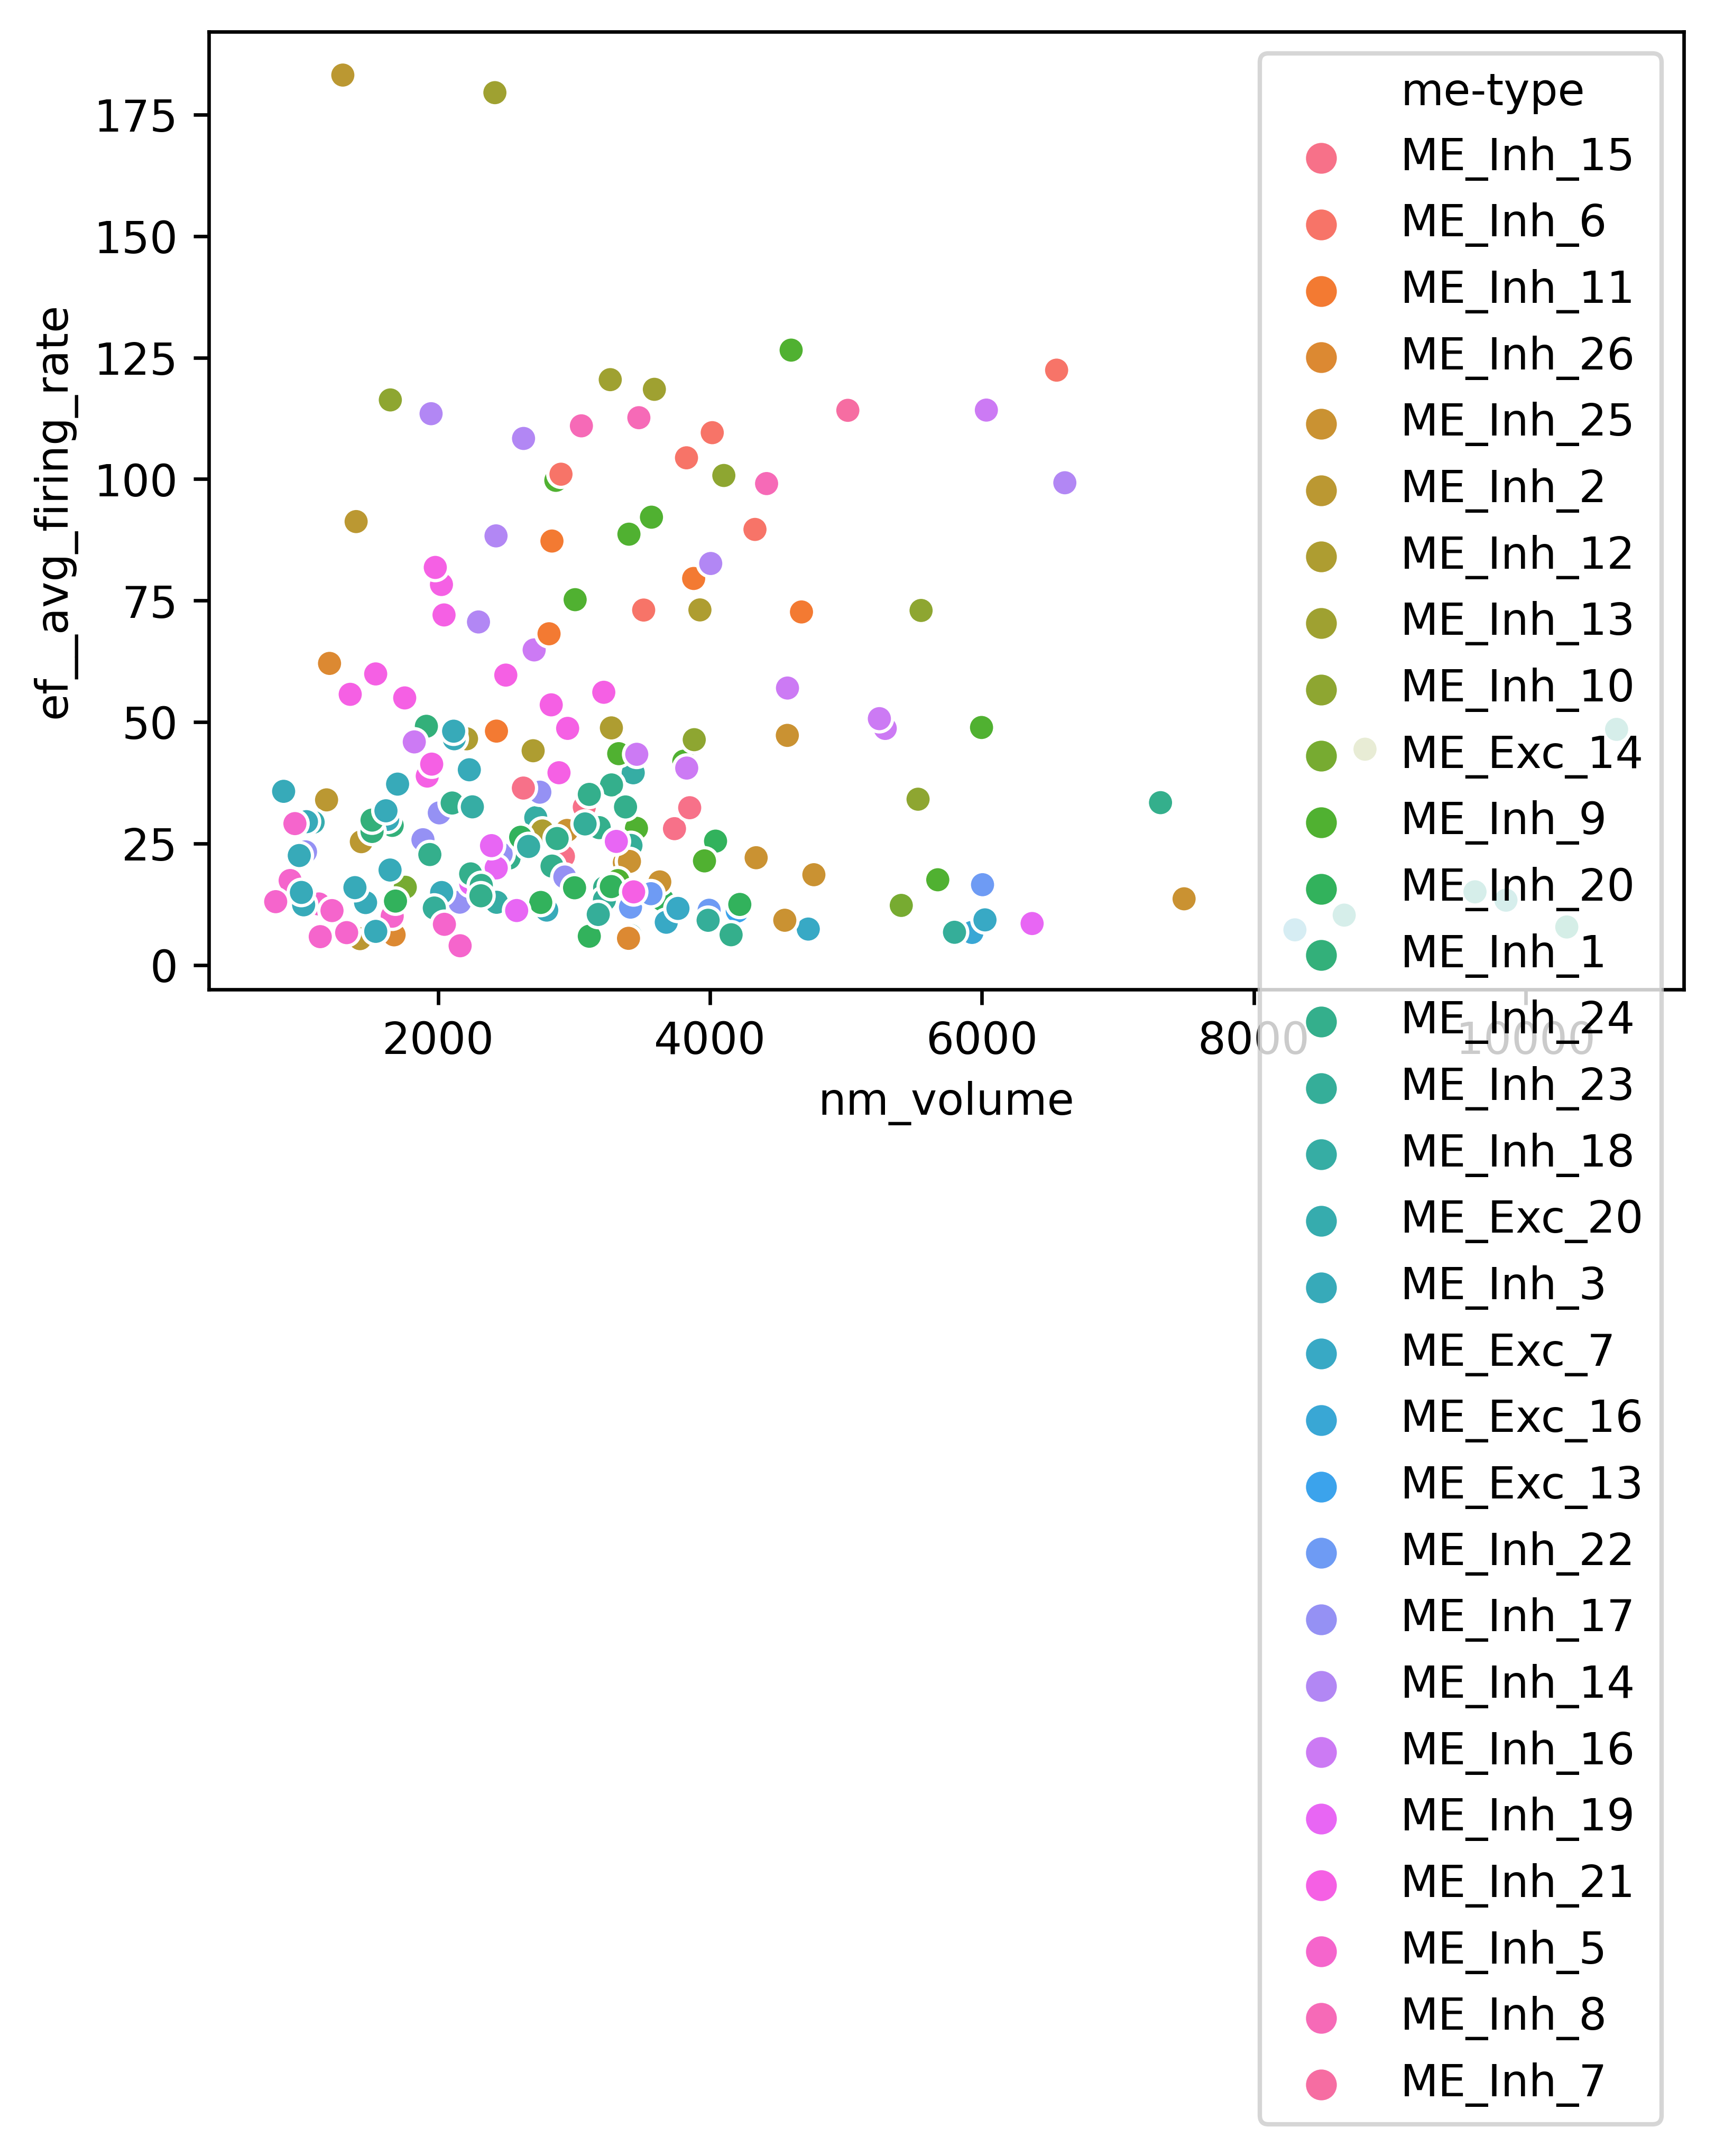

In [13]:
sns.scatterplot(data=df,x='nm_volume',y='ef__avg_firing_rate', hue='me-type')

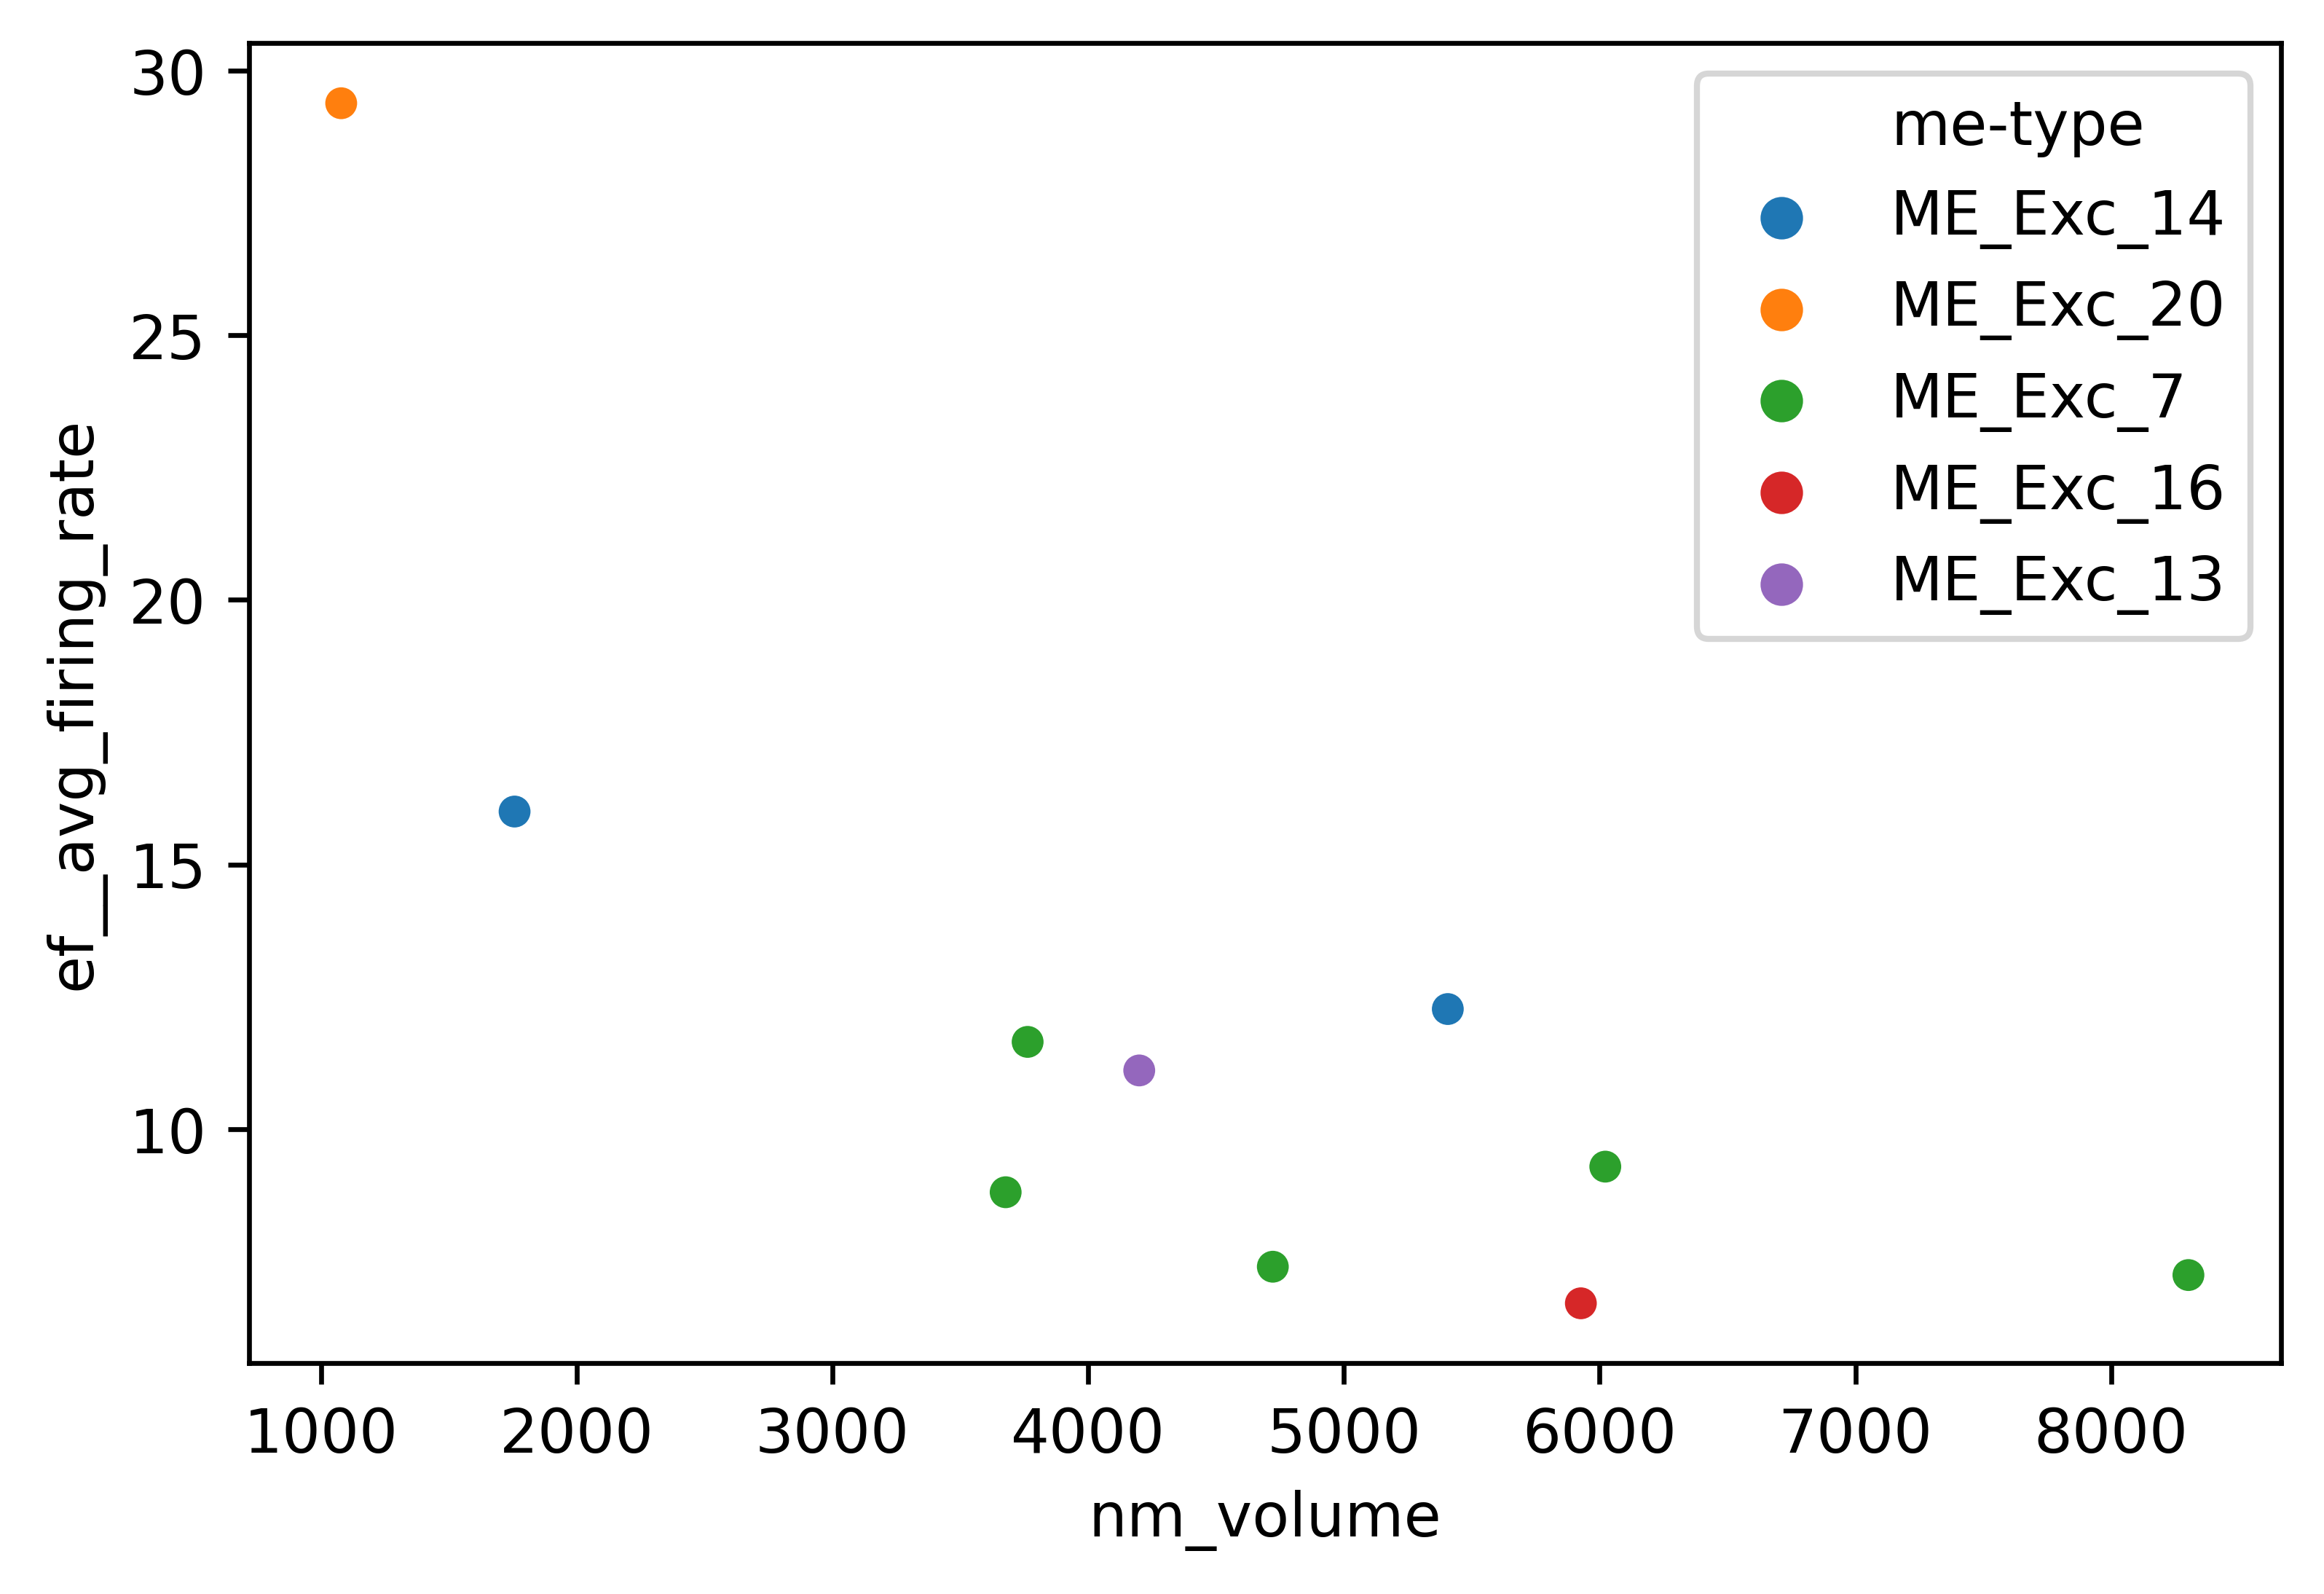

In [45]:
sns.scatterplot(data=df[df['e-type']=='Exc_3'],x='nm_volume',y='ef__avg_firing_rate', hue='me-type')

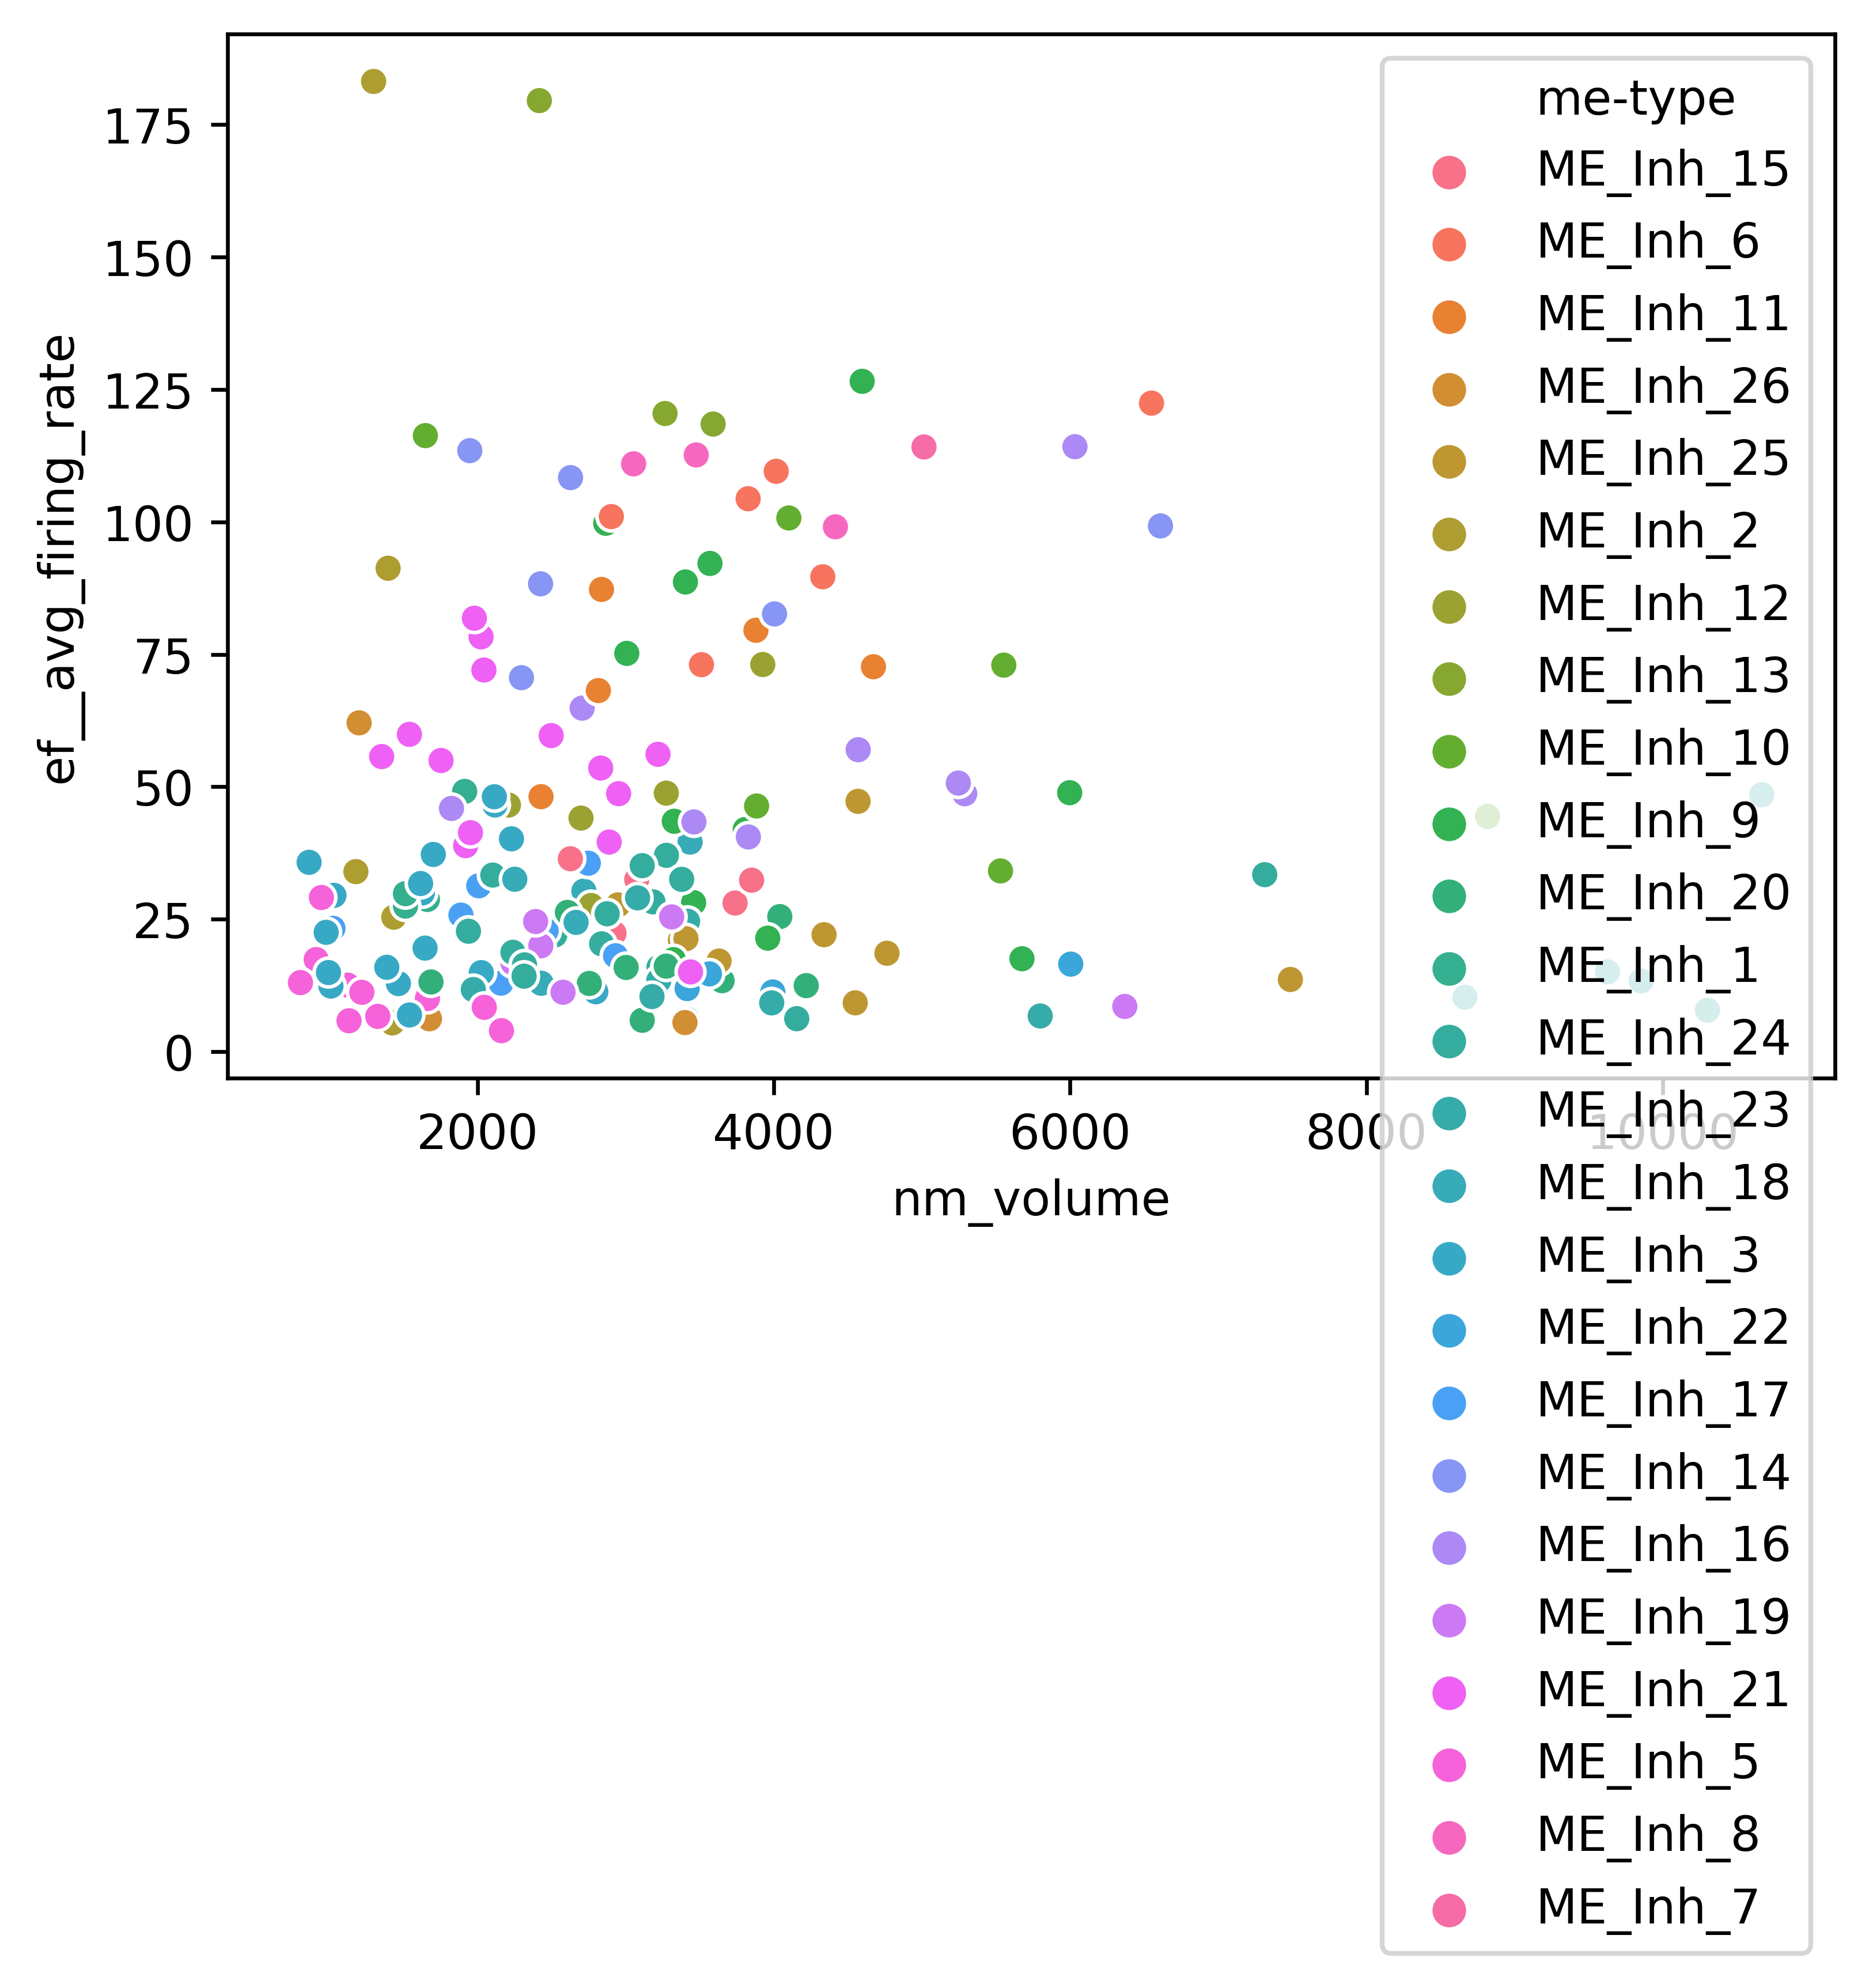

In [47]:
sns.scatterplot(data=df[df['e-type']!='Exc_3'],x='nm_volume',y='ef__avg_firing_rate',hue='me-type')

In [48]:
import pingouin as pg

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [49]:
exc_df = df[df['e-type']=='Exc_3']

In [50]:
inh_df = df[df['e-type']!='Exc_3']

In [59]:
pg.corr(exc_df['nm_volume'],exc_df['ef__avg_firing_rate'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,10,-0.763268,"[-0.94, -0.26]",0.582578,0.463315,0.010209,6.914,0.787733


In [52]:
pg.corr(inh_df['nm_volume'],inh_df['ef__avg_firing_rate'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,190,0.04872,"[-0.09, 0.19]",0.002374,-0.008296,0.504441,0.113,0.10243


In [56]:
exc_df.shape
inh_df.shape

(10, 103)

(190, 103)

In [60]:
pg.corr(exc_df['vaa3d_volume'],exc_df['ef__avg_firing_rate'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,10,-0.372551,"[-0.81, 0.34]",0.138795,-0.107264,0.289047,0.639,0.190622


In [62]:
pg.corr(exc_df['vaa3d_volume'],exc_df['ef__avg_firing_rate']).to_clipboard()

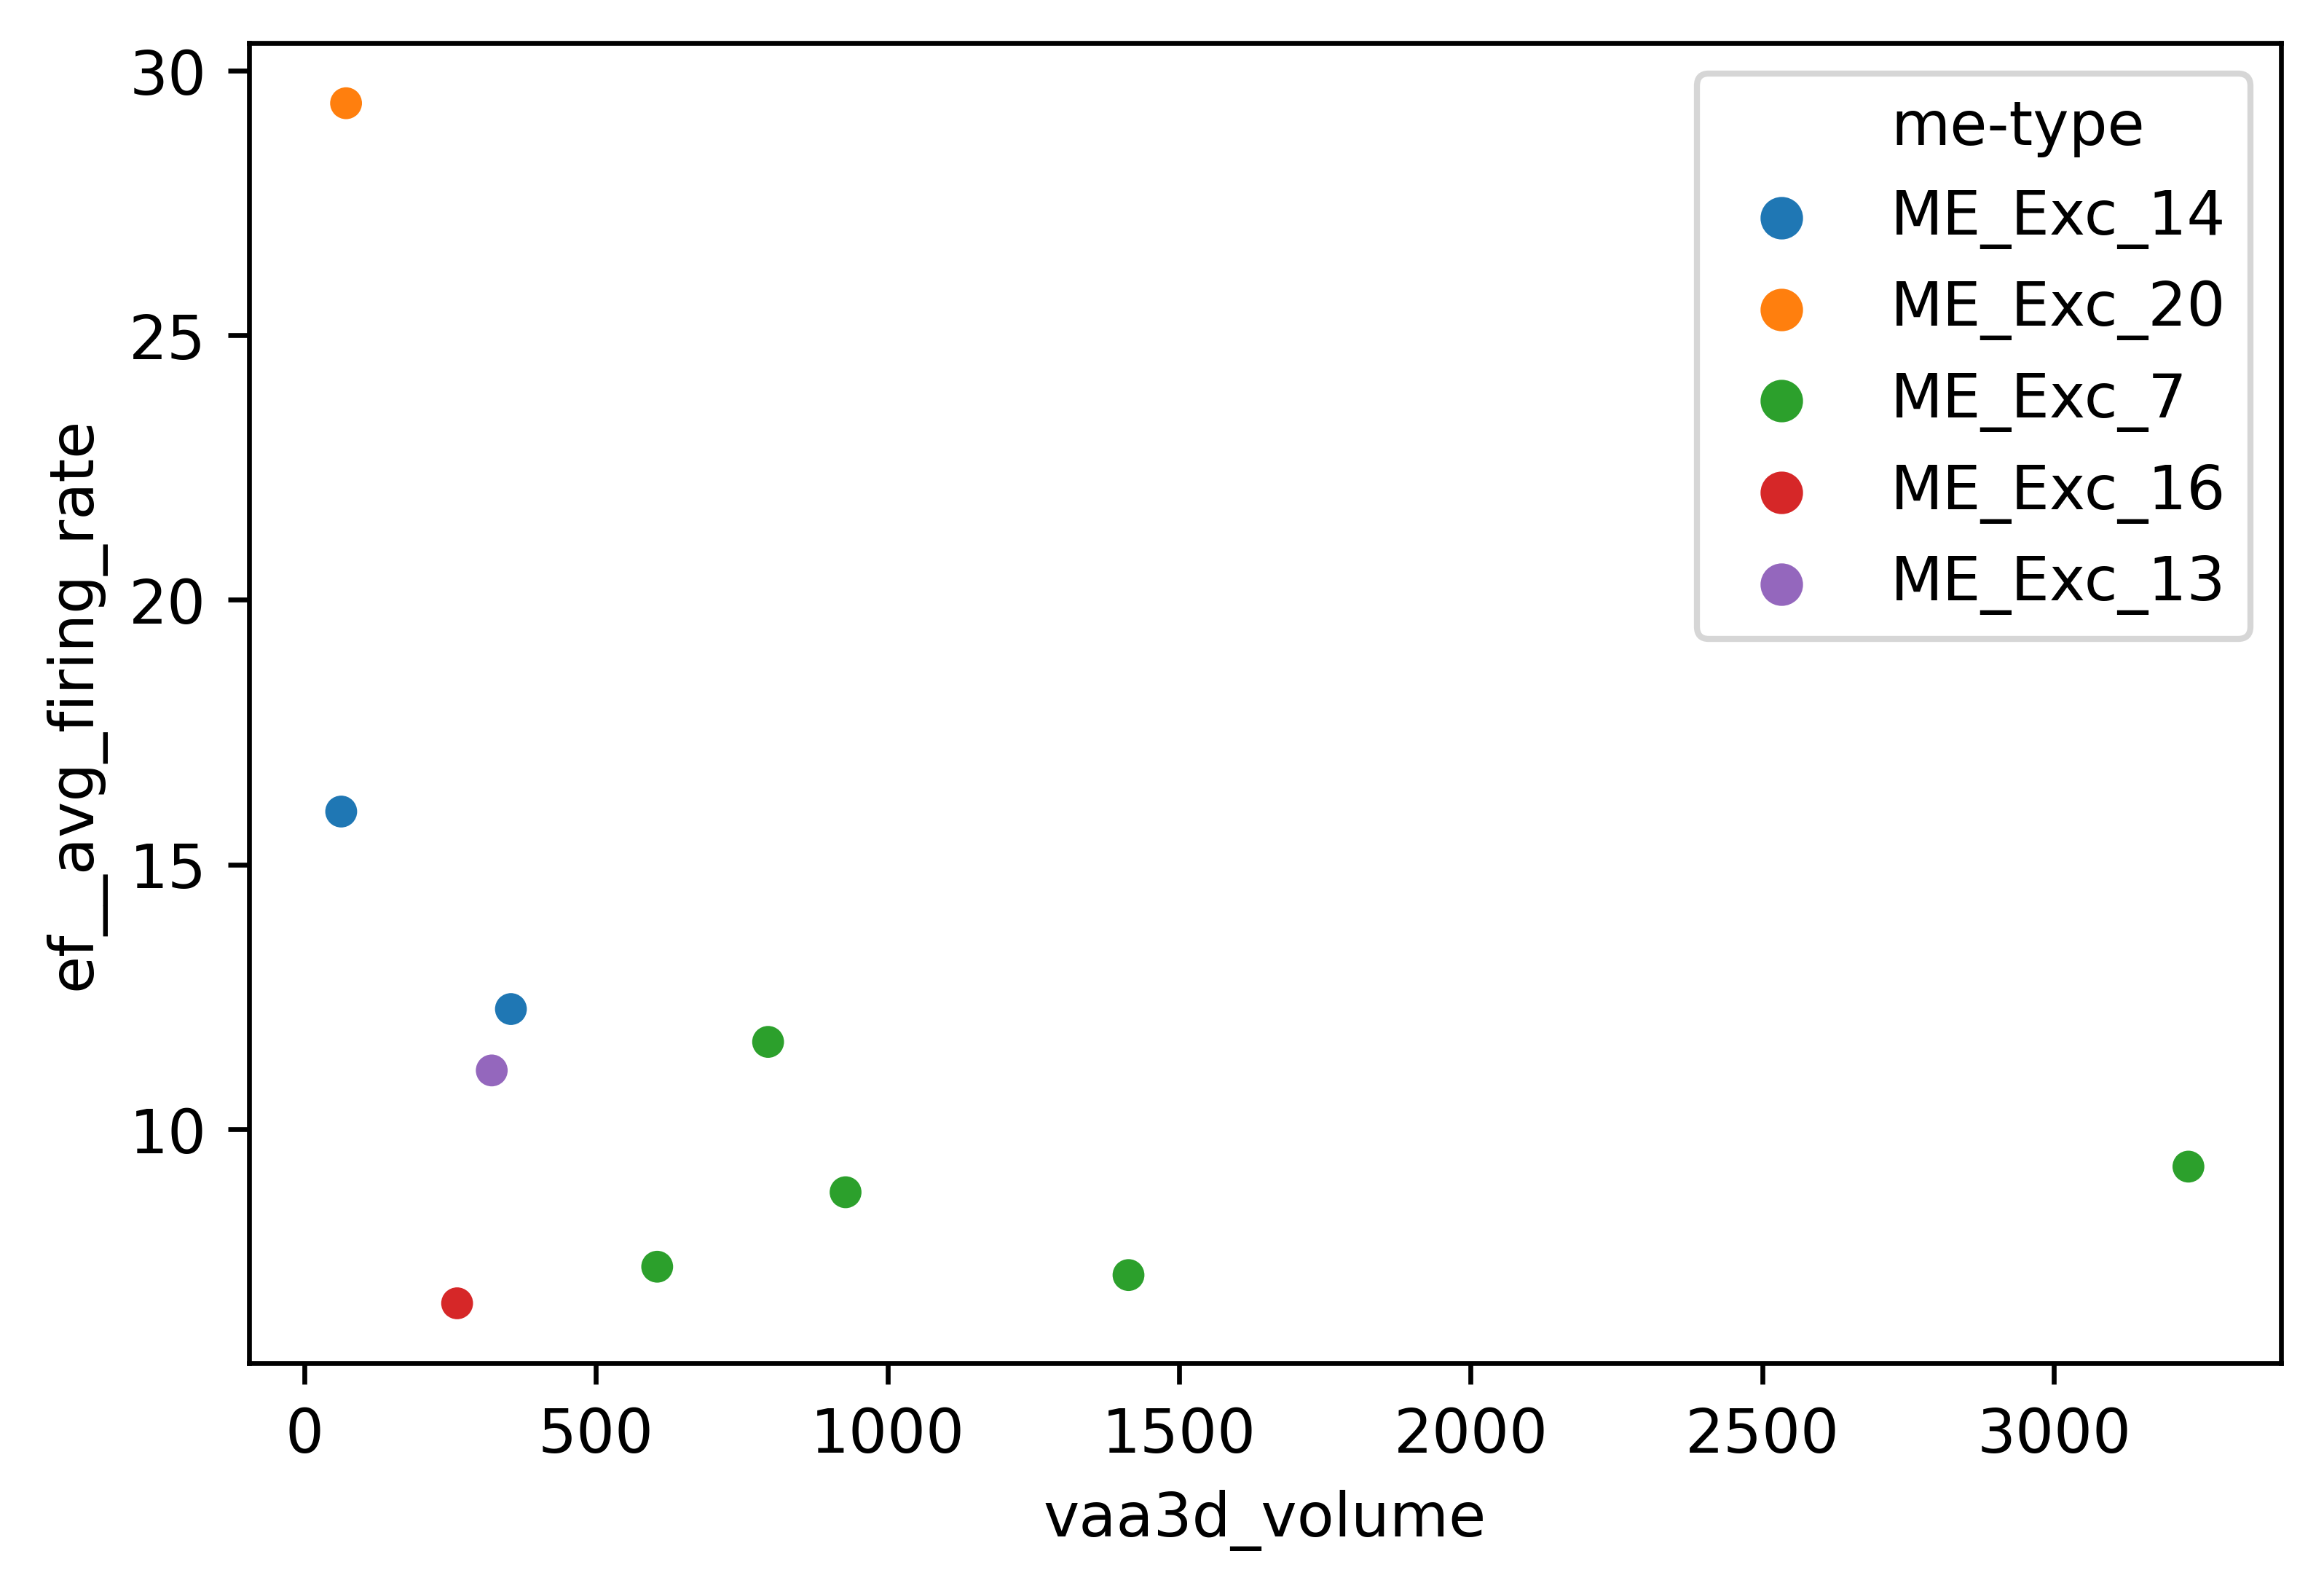

In [61]:
sns.scatterplot(data=exc_df,x='vaa3d_volume',y='ef__avg_firing_rate', hue='me-type')

In [66]:
pg.corr(df['nm_volume'],df['ef__avg_firing_rate'])
pg.corr(df['vaa3d_volume'],df['ef__avg_firing_rate'])
pg.corr(exc_df['nm_volume'],exc_df['ef__avg_firing_rate'])
pg.corr(exc_df['vaa3d_volume'],exc_df['ef__avg_firing_rate'])
pg.corr(inh_df['nm_volume'],inh_df['ef__avg_firing_rate'])
pg.corr(inh_df['vaa3d_volume'],inh_df['ef__avg_firing_rate'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,200,0.007561,"[-0.13, 0.15]",0.000057,-0.010095,0.915381,0.089,0.051216


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,200,-0.212286,"[-0.34, -0.08]",0.045065,0.03537,0.002546,8.129,0.858234


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,10,-0.763268,"[-0.94, -0.26]",0.582578,0.463315,0.010209,6.914,0.787733


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,10,-0.372551,"[-0.81, 0.34]",0.138795,-0.107264,0.289047,0.639,0.190622


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,190,0.04872,"[-0.09, 0.19]",0.002374,-0.008296,0.504441,0.113,0.10243


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,190,-0.203323,"[-0.34, -0.06]",0.04134,0.031087,0.004899,4.61,0.806857


In [67]:
df['tag__dendrite_type'].value_counts() # dendrite type matches excitatory/inhibitory classification

aspiny            156
sparsely spiny     34
spiny              10
Name: tag__dendrite_type, dtype: int64